In [3]:
#------------------------------------------
# IMPORTAR LOS MODULOS
#------------------------------------------

#Uso del módulo Pandas
import pandas as pnd

#Desactivación de la cantidad máxima de columnas del DataFrame a mostrar
pnd.set_option('display.max_columns',None)


#------------------------------------------
# ANALISIS DE LOS DATOS
#------------------------------------------

#Recuperación del código de la primera parte
nuevoPokedex = pnd.read_csv("datas/nuevoPokedex.csv")


## ¿Cuáles son los tipos de Pokémon que debe tener un domador?

Responder a nuestro problema es como ponerse en la piel de un domador de Pokémon. Para maximizar las posibilidades de ganar, el domador de los Pokémon tiene en su colección los principales Pokémon del Pokédex.

En efecto, tener los Pokémon que se encuentran más habitualmente significa que hay muchas posibilidades de que los adversarios posean los mismos. Saber que dos Pokémon del mismo tipo pueden bloquear los ataques puede servirnos para evitar perder el combate (https://pokemondb.net/type/dual).

A fin de conocer los Pokémon indispensables para cualquier domador, vamos a utilizar un gráfico donde podremos visualizar rápidamente su cantidad en función de su tipo. Este es el programa que hay que utilizar:

c:\Users\Xenia 15\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Xenia 15\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Xenia 15\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Xenia 15\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

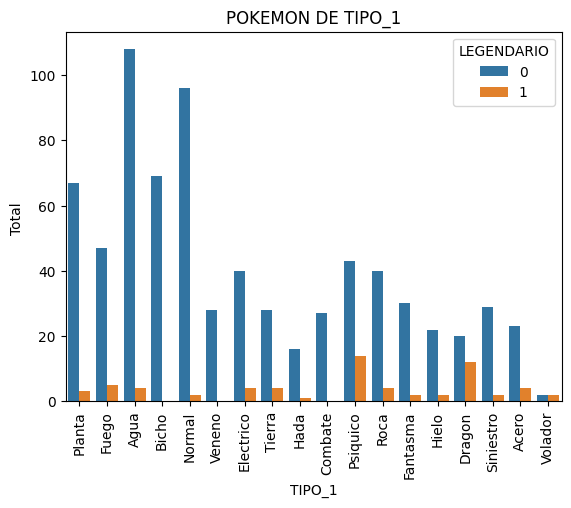

In [4]:
#Segunda parte

import matplotlib.pyplot as plt
import seaborn as sns

#Visualizacion de los Pokemon de tipo 1
axe_X = sns.countplot(x="TIPO_1", hue="LEGENDARIO", data=nuevoPokedex)
plt.xticks(rotation= 90)
plt.xlabel('TIPO_1')
plt.ylabel('Total ')
plt.title("POKEMON DE TIPO_1")
plt.show()


c:\Users\Xenia 15\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Xenia 15\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Xenia 15\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Xenia 15\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

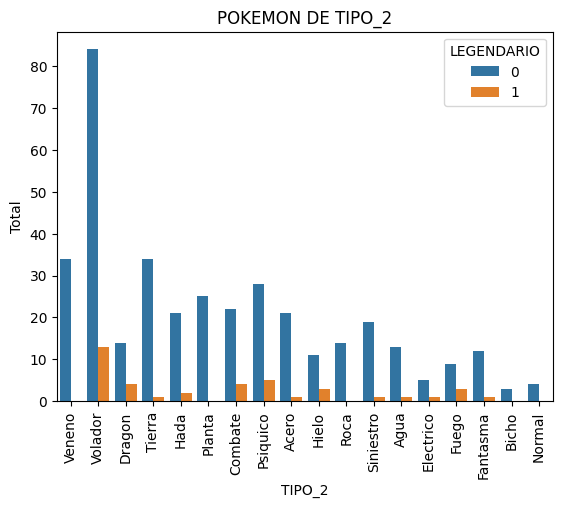

In [5]:
#Visualización de los Pokemon de tipo 2
axe_X = sns.countplot(x="TIPO_2", hue="LEGENDARIO", data=nuevoPokedex)
plt.xticks(rotation= 90)
plt.xlabel('TIPO_2')
plt.ylabel('Total')
plt.title("POKEMON DE TIPO_2")
plt.show()


Esta información nos permite afirmar que un domador debe tener en su colección Pokémon de primer tipo «Planta», «Agua», «Bicho» y «Normal». Luego «Volador», «Veneno» y «Tierra» de segundo tipo para poder bloquear los ataques porque son los Pokémon que tienen una barra en el histograma más alta que los otros.

¡Esta primera información es interesante!

Ahora vamos a intentar determinar qué Pokémon tienen un índice de victorias superior a los otros.

## Los tipos de Pokémon ganadores y perdedores

En nuestro caso, es importante conocer los tipos de Pokémon ganadores. En efecto, asegurándose de tenerlos en su colección y usarlos en los combates, el domador tiene muchas posibilidades de ganar.

Para obtener esta información, se calcula la media de los porcentajes de victorias de cada Pokémon. Esta media calculada y agrupada por tipo de Pokémon luego se ordena de menor a mayor:

In [6]:
#Búsqueda de correlación
print(nuevoPokedex.groupby('TIPO_1').agg({"PORCENTAJE_DE_VICTORIAS": "mean"}).sort_values(by = "PORCENTAJE_DE_VICTORIAS"))


           PORCENTAJE_DE_VICTORIAS
TIPO_1                            
Hada                      0.329300
Roca                      0.404852
Acero                     0.424529
Veneno                    0.433262
Bicho                     0.439006
Hielo                     0.439604
Planta                    0.440364
Agua                      0.469357
Combate                   0.475616
Fantasma                  0.484027
Normal                    0.535578
Tierra                    0.541526
Psiquico                  0.545747
Fuego                     0.579215
Siniestro                 0.629726
Electrico                 0.632861
Dragon                    0.633587
Volador                   0.765061


### Clasificación de los Pokémon según el porcentaje medio de sus victorias

Podemos deducir, pues, que los Pokémon ganadores son del tipo:

*    Siniestro
*    Eléctrico
*    Dragón
*    Volador

También podemos afirmar que los siguientes tipos de Pokémon a menudo están condenados a perder su combate:

*    Hada
*    Roca
*    Acero
*    Veneno
*    Bicho


### Busqueda de relaciones entre datos

Una relación entre dos datos significa que tienen un fuerte vínculo entre ellos. Como por ejemplo el estado de adulto y que la edad sea de 18 años, el hecho de saber volar y tener alas…

En nuestro caso, se trata de determinar la existencia de características que tienen un fuerte vínculo con la capacidad de ganar un combate. ¿Hay que ser rápido? ¿Hay que tener un nivel elevado de ataque? Eso es lo que vamos a descubrir.

En primer lugar, tenemos que valorar la utilidad del conjunto de datos preguntándonos: «¿Esta característica puede afectar al hecho de ganar o perder un combate?».

*    El número: no, porque es diferente para cada Pokémon.

*    El nombre: no, porque es diferente para cada Pokémon.

*    El tipo_1: sí, porque acabamos de ver que determinados tipos de Pokémon son propicios para conseguir la victoria.

*    El tipo_2: no, porque no todos los Pokémon tienen segundo tipo.

*    Los puntos de vida: sí, porque cuantos más puntos de vida se tienen, hay más posibilidades de ganar.

*    Los distintos niveles (ataque, defensa, ataque especial, defensa especial): sí, porque son características propias del combate.

*    La velocidad: sí, porque también es una característica del combate.

*    Legendario: sí, porque un Pokémon legendario tendría fuerza adicional.

Para poder ver la relación entre las características, vamos a utilizar un gráfico llamado HeatMap que se construye de la siguiente manera:

*    Cálculo de la relación de las distintas características.

*    Creación del gráfico a partir de la relación calculada



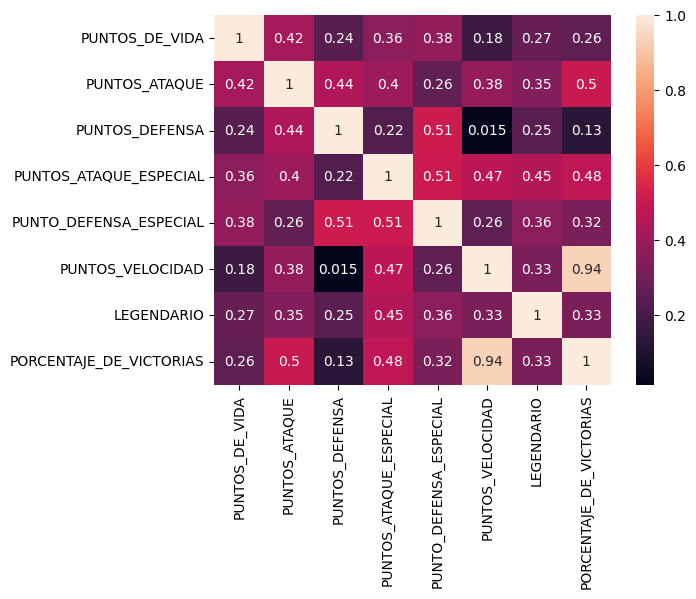

In [12]:

#corr =nuevoPokedex.corr(numeric_only=True)
corr = nuevoPokedex.loc[:,['TIPO_1','PUNTOS_DE_VIDA','PUNTOS_ATAQUE','PUNTOS_DEFENSA','PUNTOS_ATAQUE_ESPECIAL','PUNTO_DEFENSA_ESPECIAL','PUNTOS_VELOCIDAD','LEGENDARIO','PORCENTAJE_DE_VICTORIAS']].corr(numeric_only=True)

sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()


Al leer este gráfico creado con ayuda del módulo Seaborn, podemos observar que la característica Tipo_1 no está presente. Su ausencia es debida a que no es un valor digital y entonces está excluida.

¿Cómo leer este gráfico?

Como la relación se hace entre dos factores, hay que tomar la característica situada a la izquierda del gráfico (eje de ordenadas) y cruzarla con la característica situada en la parte inferior (eje de abscisas).

La cifra que se encuentra en la intersección de las dos características corresponde al porcentaje de relación. Cuanto más se acerca a 1, más fuerte es la relación. 

Si consideramos la característica que nos interesa, el porcentaje de victorias, el índice de relación es igual a 1 cuando se compara consigo misma, eso es completamente normal. A continuación, la característica Velocidad muestra una relación de 0,94 y, luego, la característica Nivel de ataque alcanza un 0,50.

Por lo tanto, podemos deducir que durante un combate la victoria está casi conseguida para el Pokémon más rápido de los dos con un nivel de ataque superior al de su adversario.

Sin embargo, experimentamos una pequeña decepción con la característica LEGENDARIO, que parecía prometedora, porque en la literatura se menciona que un Pokémon legendario tiene una fuerza superior a los otros, lo que le permitiría ganar los combates con facilidad. No obstante, comprobamos que el valor de su relación solo es del 0,33.

## Resumen de nuestras observaciones

Si resumimos las observaciones que hemos realizado, podemos decir que para conseguir la victoria durante un combate el domador de Pokémon tiene que hacer lo siguiente:

1.    Poseer Pokémon de tipo planta, agua, bicho y normal para poder bloquear los ataques.

2.    Poseer Pokémon de tipo siniestro, eléctrico, dragón y volador porque son los que tienen un índice de victorias superior.

3.    Usar un Pokémon que tenga una gran velocidad.

4.    Usar un Pokémon que tenga un buen nivel de ataque.



In [13]:
#Guardar Pokedex

dataset = nuevoPokedex
#dataset.to_csv("datas/dataset.csv", sep='\t')

#X = se toman todos los datos, pero solo las características de 4 a 11
#PUNTOS_ATAQUE;PUNTOS_DEFENSA;PUNTOS_ATAQUE_ESPECIAL;PUNTO_DEFENSA_ESPECIAL;PUNTOS_VELOCIDAD;CANTIDAD_GENERACIONES
x = dataset.iloc[:, 4:11].values

#y = solo se toma la columna PORCENTAJE_DE_VICTORIA (característica 16) los : significan "Para todas las observaciones"
y = dataset.iloc[:, 16].values

#Distribución en conjunto de aprendizaje y conjunto de prueba
from sklearn.model_selection import train_test_split
X_aprendizaje, X_verificacion, y_aprendizaje, y_verificacion = train_test_split(x, y, test_size = 0.2, random_state = 0)
